In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('2ndTrain.csv')
test = pd.read_csv('2ndTest.csv') 

In [4]:
df = pd.concat([train,test])

In [5]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


# Cleaning

## Extracting Pune Address

In [6]:
df2 = pd.DataFrame({'Address': df['ADDRESS'].values})

In [7]:
df2.head()

,Address
0,"Ksfc Layout,Bangalore"
1,"Vishweshwara Nagar,Mysore"
2,"Jigani,Bangalore"
3,"Sector-1 Vaishali,Ghaziabad"
4,"New Town,Kolkata"


In [8]:
df2 = df2['Address'].str.split(',', expand=True)
df2

,0,1,2,3,4,5
0,Ksfc Layout,Bangalore,None,None,None,None
1,Vishweshwara Nagar,Mysore,None,None,None,None
2,Jigani,Bangalore,None,None,None,None
3,Sector-1 Vaishali,Ghaziabad,None,None,None,None
4,New Town,Kolkata,None,None,None,None
...,...,...,...,...,...,...
98166,Thane West,Maharashtra,None,None,None,None
98167,Sector-66A Mohali,Mohali,None,None,None,None
98168,Balkum,Maharashtra,None,None,None,None
98169,Hadapsar,Pune,None,None,None,None


In [9]:
df2.drop(df2.iloc[:, 2:7], inplace = True, axis = 1)

In [10]:
df2.head()

,0,1
0,Ksfc Layout,Bangalore
1,Vishweshwara Nagar,Mysore
2,Jigani,Bangalore
3,Sector-1 Vaishali,Ghaziabad
4,New Town,Kolkata


In [11]:
df2 = df2.rename({0: 'Locality',1: 'City'} ,axis=1)

In [12]:
df2.head()

,Locality,City
0,Ksfc Layout,Bangalore
1,Vishweshwara Nagar,Mysore
2,Jigani,Bangalore
3,Sector-1 Vaishali,Ghaziabad
4,New Town,Kolkata


In [13]:
df = pd.merge(df,df2, left_index=True, right_index=True)

In [14]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),Locality,City
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,Ksfc Layout,Bangalore
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700,NaN,Ksfc Layout,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,Vishweshwara Nagar,Mysore
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278,NaN,Vishweshwara Nagar,Mysore
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,Jigani,Bangalore


In [15]:
df.isnull().sum()

POSTED_BY                    0
UNDER_CONSTRUCTION           0
RERA                         0
BHK_NO.                      0
BHK_OR_RK                    0
SQUARE_FT                    0
READY_TO_MOVE                0
RESALE                       0
ADDRESS                      0
LONGITUDE                    0
LATITUDE                     0
TARGET(PRICE_IN_LACS)    68720
Locality                     0
City                         0
dtype: int64

In [16]:
df.drop('ADDRESS' ,axis='columns', inplace=True)

In [17]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),Locality,City
0,Owner,0,0,2,BHK,1300.236407,1,1,12.969910,77.597960,55.0,Ksfc Layout,Bangalore
0,Owner,0,0,1,BHK,545.171340,1,1,21.262000,73.047700,NaN,Ksfc Layout,Bangalore
1,Dealer,0,0,2,BHK,1275.000000,1,1,12.274538,76.644605,51.0,Vishweshwara Nagar,Mysore
1,Dealer,1,1,2,BHK,800.000000,0,0,18.966114,73.148278,NaN,Vishweshwara Nagar,Mysore
2,Owner,0,0,2,BHK,933.159722,1,1,12.778033,77.632191,43.0,Jigani,Bangalore


In [18]:
df3= df[df['City'] == 'Pune']

In [19]:
df3.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),Locality,City
21,Dealer,0,0,2,BHK,944.881890,1,1,18.452663,73.931040,42.0,Undri,Pune
21,Dealer,0,0,3,BHK,1522.857143,1,1,16.404600,80.557900,NaN,Undri,Pune
36,Dealer,1,1,2,BHK,1020.087884,0,1,18.599300,73.762500,65.0,Wakad,Pune
36,Dealer,1,0,3,BHK,900.000000,0,1,26.166670,91.766670,NaN,Wakad,Pune
41,Dealer,0,1,2,BHK,1058.114928,1,1,18.539812,73.737678,65.0,Sus,Pune


In [20]:
df3.isnull().sum()

POSTED_BY                   0
UNDER_CONSTRUCTION          0
RERA                        0
BHK_NO.                     0
BHK_OR_RK                   0
SQUARE_FT                   0
READY_TO_MOVE               0
RESALE                      0
LONGITUDE                   0
LATITUDE                    0
TARGET(PRICE_IN_LACS)    4650
Locality                    0
City                        0
dtype: int64

In [21]:
df3.shape

(6634, 13)

### Filling Null values

In [22]:
df3['TARGET(PRICE_IN_LACS)'] = df3['TARGET(PRICE_IN_LACS)'].fillna(method = 'ffill')

C:\Users\Sridhar Rambhatla\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
df3.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
Locality                 0
City                     0
dtype: int64

In [24]:
df3.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),Locality,City
21,Dealer,0,0,2,BHK,944.881890,1,1,18.452663,73.931040,42.0,Undri,Pune
21,Dealer,0,0,3,BHK,1522.857143,1,1,16.404600,80.557900,42.0,Undri,Pune
36,Dealer,1,1,2,BHK,1020.087884,0,1,18.599300,73.762500,65.0,Wakad,Pune
36,Dealer,1,0,3,BHK,900.000000,0,1,26.166670,91.766670,65.0,Wakad,Pune
41,Dealer,0,1,2,BHK,1058.114928,1,1,18.539812,73.737678,65.0,Sus,Pune


In [25]:
df3['POSTED_BY'].unique()

array(['Dealer', 'Builder', 'Owner'], dtype=object)

In [26]:
df3.shape

(6634, 13)

In [27]:
df3.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),Locality,City
21,Dealer,0,0,2,BHK,944.881890,1,1,18.452663,73.931040,42.0,Undri,Pune
21,Dealer,0,0,3,BHK,1522.857143,1,1,16.404600,80.557900,42.0,Undri,Pune
36,Dealer,1,1,2,BHK,1020.087884,0,1,18.599300,73.762500,65.0,Wakad,Pune
36,Dealer,1,0,3,BHK,900.000000,0,1,26.166670,91.766670,65.0,Wakad,Pune
41,Dealer,0,1,2,BHK,1058.114928,1,1,18.539812,73.737678,65.0,Sus,Pune


In [28]:
df3['PRICE_PER_SQFT'] = (df3['TARGET(PRICE_IN_LACS)']*100000)/df3['SQUARE_FT']

C:\Users\Sridhar Rambhatla\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
df3.to_csv('geographical_data_pune.csv')

# EDA

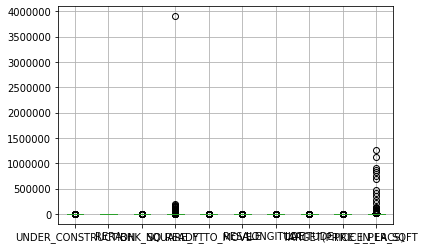

In [30]:
df3.boxplot()

In [31]:
q1 = df3.quantile(0.25)
q3 = df3.quantile(0.75)
IQR = q3-q1
IQR

df3 = df3[~((df3) > (q3 + (1.5 * IQR))).any(axis=1)]

df3.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),Locality,City,PRICE_PER_SQFT
21,Dealer,0,0,2,BHK,944.881890,1,1,18.452663,73.931040,42.0,Undri,Pune,4445.000000
21,Dealer,0,0,3,BHK,1522.857143,1,1,16.404600,80.557900,42.0,Undri,Pune,2757.973733
41,Dealer,0,1,2,BHK,1058.114928,1,1,18.539812,73.737678,65.0,Sus,Pune,6142.999997
98,Dealer,0,1,2,BHK,1193.440032,1,1,18.441256,74.647361,60.4,Talegaon,Pune,5060.999998
98,Dealer,0,1,2,BHK,1027.066216,1,1,18.585300,73.741300,60.4,Talegaon,Pune,5880.828233


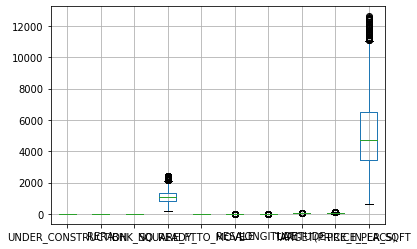

In [32]:
df3.boxplot()

# Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df3['Locality'] = le.fit_transform(df3['Locality'])
df3.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),Locality,City,PRICE_PER_SQFT
21,Dealer,0,0,2,BHK,944.881890,1,1,18.452663,73.931040,42.0,349,Pune,4445.000000
21,Dealer,0,0,3,BHK,1522.857143,1,1,16.404600,80.557900,42.0,349,Pune,2757.973733
41,Dealer,0,1,2,BHK,1058.114928,1,1,18.539812,73.737678,65.0,328,Pune,6142.999997
98,Dealer,0,1,2,BHK,1193.440032,1,1,18.441256,74.647361,60.4,334,Pune,5060.999998
98,Dealer,0,1,2,BHK,1027.066216,1,1,18.585300,73.741300,60.4,334,Pune,5880.828233


# Plotting the Longitude and Latitude

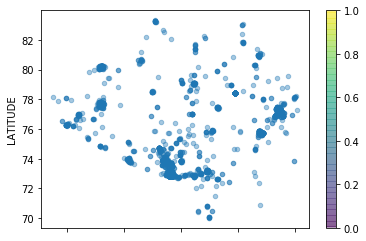

In [37]:
import matplotlib.pyplot as plt
df3.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.4,cmap=plt.get_cmap("jet"))
plt.show()

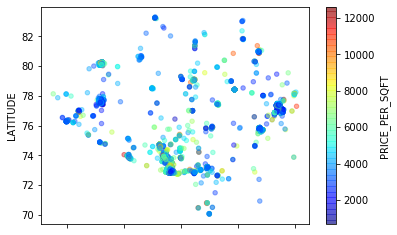

In [39]:
df3.plot(kind="scatter", x="LONGITUDE", y="LATITUDE",
    c="PRICE_PER_SQFT", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4)
plt.show()